In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np

# Load the data

In [2]:
df = pd.read_csv('mod_data_training_ys_4.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1460 non-null   object 
 1   river_level_max           1460 non-null   float64
 2   rainfall                  1460 non-null   float64
 3   sunshine_duration         1460 non-null   float64
 4   temperature_avg           1460 non-null   float64
 5   wind_speed_avg            1460 non-null   float64
 6   humidity_avg              1460 non-null   float64
 7   condition                 1460 non-null   float64
 8   river_level_max_tomorrow  1460 non-null   float64
dtypes: float64(8), object(1)
memory usage: 102.9+ KB


In [4]:
df.isna().sum()

date                        1
river_level_max             1
rainfall                    1
sunshine_duration           1
temperature_avg             1
wind_speed_avg              1
humidity_avg                1
condition                   1
river_level_max_tomorrow    1
dtype: int64

In [5]:
df.dropna(inplace=True)
#df

In [6]:
df.describe()

,river_level_max,rainfall,sunshine_duration,temperature_avg,wind_speed_avg,humidity_avg,condition,river_level_max_tomorrow
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,89.458442,5.334110,5.981918,28.751096,2.204795,75.821233,0.160959,89.397163
std,85.980059,15.295454,2.908333,0.895150,0.893111,5.651905,0.564651,86.011929
min,0.000000,0.000000,0.000000,24.900000,0.000000,58.000000,0.000000,0.000000
25%,71.084677,0.100000,3.900000,28.200000,2.000000,72.000000,0.000000,71.000000
50%,89.467711,0.600000,6.600000,28.800000,2.000000,76.000000,0.000000,89.467711
75%,92.000000,1.925000,8.300000,29.400000,3.000000,80.000000,0.000000,92.000000
max,1292.000000,155.500000,11.600000,31.400000,7.000000,94.000000,3.000000,1292.000000


In [7]:
target_column = 'river_level_max_tomorrow'
feature_columns = ['rainfall', 'sunshine_duration',
                   'temperature_avg', 'wind_speed_avg',	'humidity_avg']

# Normalisasi

In [8]:
df.loc[:, feature_columns] = ((df[feature_columns] - df[feature_columns].min())/ 
                              (df[feature_columns].max() - df[feature_columns].min()))

df[feature_columns].describe()

,rainfall,sunshine_duration,temperature_avg,wind_speed_avg,humidity_avg
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.034303,0.515683,0.592476,0.314971,0.495034
std,0.098363,0.250718,0.137715,0.127587,0.156997
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000643,0.336207,0.507692,0.285714,0.388889
50%,0.003859,0.568966,0.600000,0.285714,0.500000
75%,0.012379,0.715517,0.692308,0.428571,0.611111
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Train & test split

In [9]:
# Shuffle
df = df.sample(frac=1)

# Calculate test set size
test_set_size = int(len(df) * 0.01)

# Split the data
testing_df = df[:test_set_size]
training_df = df[test_set_size:]

print("Number of training data = ", len(training_df))
print("Number of testing data = ", len(testing_df))

Number of training data =  1446
Number of testing data =  14


In [10]:
train_features = np.asarray(training_df[feature_columns])
test_features = np.asarray(testing_df[feature_columns])

train_label = np.asarray(training_df[target_column])
test_label = np.asarray(testing_df[target_column])

# Simple DNN model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [12]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=["mae"])

# Training the model

In [13]:
batch_size = 20
history = model.fit(train_features, train_label, epochs=500, validation_split=0.1, batch_size=batch_size)

Epoch 1/500
66/66 [==============================] - 4s 25ms/step - loss: 87.0663 - mae: 87.5050 - val_loss: 99.1353 - val_mae: 99.5897
Epoch 2/500
66/66 [==============================] - 1s 8ms/step - loss: 87.6019 - mae: 88.0405 - val_loss: 99.1218 - val_mae: 99.5774
Epoch 3/500
66/66 [==============================] - 1s 8ms/step - loss: 84.1267 - mae: 84.5657 - val_loss: 99.1084 - val_mae: 99.5654
Epoch 4/500
66/66 [==============================] - 1s 8ms/step - loss: 87.5829 - mae: 88.0339 - val_loss: 99.0951 - val_mae: 99.5533
Epoch 5/500
66/66 [==============================] - 1s 8ms/step - loss: 86.7486 - mae: 87.1915 - val_loss: 99.0821 - val_mae: 99.5416
Epoch 6/500
66/66 [==============================] - 1s 8ms/step - loss: 82.9564 - mae: 83.4015 - val_loss: 99.0690 - val_mae: 99.5298
Epoch 7/500
66/66 [==============================] - 1s 8ms/step - loss: 86.1884 - mae: 86.6366 - val_loss: 99.0560 - val_mae: 99.5181
Epoch 8/500
66/66 [==============================] - 1

66/66 [==============================] - 0s 8ms/step - loss: 82.0543 - mae: 82.5541 - val_loss: 95.8331 - val_mae: 96.3331
Epoch 122/500
66/66 [==============================] - 1s 8ms/step - loss: 85.1809 - mae: 85.6808 - val_loss: 95.7212 - val_mae: 96.2212
Epoch 123/500
66/66 [==============================] - 1s 8ms/step - loss: 84.1026 - mae: 84.6026 - val_loss: 95.6028 - val_mae: 96.1028
Epoch 124/500
66/66 [==============================] - 1s 8ms/step - loss: 84.1470 - mae: 84.6470 - val_loss: 95.4778 - val_mae: 95.9778
Epoch 125/500
66/66 [==============================] - 1s 8ms/step - loss: 83.5035 - mae: 84.0035 - val_loss: 95.3455 - val_mae: 95.8455
Epoch 126/500
66/66 [==============================] - 1s 8ms/step - loss: 81.6704 - mae: 82.1704 - val_loss: 95.2096 - val_mae: 95.7096
Epoch 127/500
66/66 [==============================] - 1s 8ms/step - loss: 83.2049 - mae: 83.7049 - val_loss: 95.0641 - val_mae: 95.5641
Epoch 128/500
66/66 [==============================] - 

Epoch 181/500
66/66 [==============================] - 0s 6ms/step - loss: 37.4075 - mae: 37.8952 - val_loss: 40.9169 - val_mae: 41.4053
Epoch 182/500
66/66 [==============================] - 0s 5ms/step - loss: 35.6787 - mae: 36.1616 - val_loss: 40.9194 - val_mae: 41.4147
Epoch 183/500
66/66 [==============================] - 0s 5ms/step - loss: 39.4997 - mae: 39.9881 - val_loss: 40.9171 - val_mae: 41.4130
Epoch 184/500
66/66 [==============================] - 0s 5ms/step - loss: 32.6007 - mae: 33.0890 - val_loss: 40.9108 - val_mae: 41.4051
Epoch 185/500
66/66 [==============================] - 0s 5ms/step - loss: 32.7980 - mae: 33.2851 - val_loss: 40.9040 - val_mae: 41.3953
Epoch 186/500
66/66 [==============================] - 0s 6ms/step - loss: 33.7971 - mae: 34.2819 - val_loss: 40.9037 - val_mae: 41.3980
Epoch 187/500
66/66 [==============================] - 0s 5ms/step - loss: 37.0299 - mae: 37.5201 - val_loss: 40.8973 - val_mae: 41.3890
Epoch 188/500
66/66 [====================

Epoch 241/500
66/66 [==============================] - 1s 8ms/step - loss: 33.0005 - mae: 33.4822 - val_loss: 40.7642 - val_mae: 41.2541
Epoch 242/500
66/66 [==============================] - 1s 8ms/step - loss: 35.0172 - mae: 35.4985 - val_loss: 40.7612 - val_mae: 41.2506
Epoch 243/500
66/66 [==============================] - 1s 8ms/step - loss: 34.0434 - mae: 34.5220 - val_loss: 40.7599 - val_mae: 41.2468
Epoch 244/500
66/66 [==============================] - 0s 8ms/step - loss: 35.1470 - mae: 35.6295 - val_loss: 40.7578 - val_mae: 41.2478
Epoch 245/500
66/66 [==============================] - 1s 8ms/step - loss: 32.6623 - mae: 33.1429 - val_loss: 40.7556 - val_mae: 41.2438
Epoch 246/500
66/66 [==============================] - 1s 8ms/step - loss: 34.1973 - mae: 34.6790 - val_loss: 40.7542 - val_mae: 41.2410
Epoch 247/500
66/66 [==============================] - 1s 8ms/step - loss: 33.0533 - mae: 33.5341 - val_loss: 40.7518 - val_mae: 41.2378
Epoch 248/500
66/66 [====================

Epoch 301/500
66/66 [==============================] - 1s 8ms/step - loss: 34.3819 - mae: 34.8638 - val_loss: 40.6615 - val_mae: 41.1405
Epoch 302/500
66/66 [==============================] - 1s 8ms/step - loss: 33.9551 - mae: 34.4289 - val_loss: 40.6506 - val_mae: 41.1380
Epoch 303/500
66/66 [==============================] - 1s 8ms/step - loss: 34.6155 - mae: 35.0989 - val_loss: 40.6490 - val_mae: 41.1352
Epoch 304/500
66/66 [==============================] - 1s 8ms/step - loss: 38.4274 - mae: 38.9101 - val_loss: 40.6463 - val_mae: 41.1339
Epoch 305/500
66/66 [==============================] - 1s 8ms/step - loss: 36.8278 - mae: 37.3112 - val_loss: 40.6436 - val_mae: 41.1348
Epoch 306/500
66/66 [==============================] - 0s 8ms/step - loss: 31.6120 - mae: 32.0950 - val_loss: 40.6426 - val_mae: 41.1305
Epoch 307/500
66/66 [==============================] - 1s 8ms/step - loss: 36.2990 - mae: 36.7812 - val_loss: 40.6398 - val_mae: 41.1283
Epoch 308/500
66/66 [====================

Epoch 361/500
66/66 [==============================] - 0s 7ms/step - loss: 36.4939 - mae: 36.9799 - val_loss: 40.5588 - val_mae: 41.0465
Epoch 362/500
66/66 [==============================] - 0s 7ms/step - loss: 34.1464 - mae: 34.6272 - val_loss: 40.5624 - val_mae: 41.0454
Epoch 363/500
66/66 [==============================] - 0s 7ms/step - loss: 37.5456 - mae: 38.0277 - val_loss: 40.5598 - val_mae: 41.0435
Epoch 364/500
66/66 [==============================] - 0s 7ms/step - loss: 33.5326 - mae: 34.0146 - val_loss: 40.5554 - val_mae: 41.0449
Epoch 365/500
66/66 [==============================] - 0s 7ms/step - loss: 34.4930 - mae: 34.9736 - val_loss: 40.5539 - val_mae: 41.0414
Epoch 366/500
66/66 [==============================] - 0s 7ms/step - loss: 39.8908 - mae: 40.3734 - val_loss: 40.5571 - val_mae: 41.0407
Epoch 367/500
66/66 [==============================] - 0s 7ms/step - loss: 35.3761 - mae: 35.8594 - val_loss: 40.5525 - val_mae: 41.0405
Epoch 368/500
66/66 [====================

Epoch 421/500
66/66 [==============================] - 0s 6ms/step - loss: 34.8079 - mae: 35.2888 - val_loss: 40.4965 - val_mae: 40.9817
Epoch 422/500
66/66 [==============================] - 0s 6ms/step - loss: 34.2173 - mae: 34.6969 - val_loss: 40.4937 - val_mae: 40.9724
Epoch 423/500
66/66 [==============================] - 0s 7ms/step - loss: 32.5429 - mae: 33.0245 - val_loss: 40.4913 - val_mae: 40.9711
Epoch 424/500
66/66 [==============================] - 1s 8ms/step - loss: 33.7073 - mae: 34.1862 - val_loss: 40.4860 - val_mae: 40.9694
Epoch 425/500
66/66 [==============================] - 0s 8ms/step - loss: 34.1453 - mae: 34.6244 - val_loss: 40.4847 - val_mae: 40.9682
Epoch 426/500
66/66 [==============================] - 1s 8ms/step - loss: 33.8719 - mae: 34.3526 - val_loss: 40.4832 - val_mae: 40.9665
Epoch 427/500
66/66 [==============================] - 1s 8ms/step - loss: 33.6252 - mae: 34.1009 - val_loss: 40.4821 - val_mae: 40.9644
Epoch 428/500
66/66 [====================

Epoch 481/500
66/66 [==============================] - ETA: 0s - loss: 31.9470 - mae: 32.423 - 1s 8ms/step - loss: 32.2149 - mae: 32.6919 - val_loss: 40.4334 - val_mae: 40.9168
Epoch 482/500
66/66 [==============================] - 1s 8ms/step - loss: 36.2658 - mae: 36.7445 - val_loss: 40.4348 - val_mae: 40.9106
Epoch 483/500
66/66 [==============================] - 0s 8ms/step - loss: 33.6754 - mae: 34.1531 - val_loss: 40.4301 - val_mae: 40.9125
Epoch 484/500
66/66 [==============================] - 1s 8ms/step - loss: 37.1048 - mae: 37.5815 - val_loss: 40.4290 - val_mae: 40.9095
Epoch 485/500
66/66 [==============================] - 1s 8ms/step - loss: 31.4219 - mae: 31.9036 - val_loss: 40.4301 - val_mae: 40.9073
Epoch 486/500
66/66 [==============================] - 1s 8ms/step - loss: 36.9990 - mae: 37.4799 - val_loss: 40.4309 - val_mae: 40.9051
Epoch 487/500
66/66 [==============================] - 1s 8ms/step - loss: 36.1844 - mae: 36.6606 - val_loss: 40.4257 - val_mae: 40.9086
E

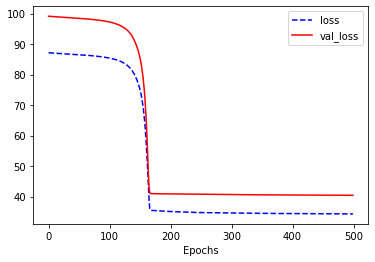

In [14]:
import matplotlib.pyplot as plt

mae = history.history['mae']
loss = history.history['loss']
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']
epochs = range(len(mae))

# Plot loss & validation loss
plt.figure()
plt.plot(epochs, loss, '--b')
plt.plot(epochs, val_loss, '-r')
plt.xlabel("Epochs")
plt.legend(["loss", "val_loss"])
plt.show()

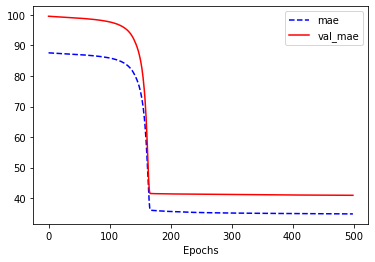

In [15]:
# Plot mae & validation mae
plt.figure()
plt.plot(epochs, mae, '--b')
plt.plot(epochs, val_mae, '-r')
plt.xlabel("Epochs")
plt.legend(["mae", "val_mae"])
plt.show()

# Testing

In [16]:
prediction = model.predict(test_features[0:1])

In [17]:
prediction

array([[89.09872]], dtype=float32)

In [18]:
mse = tf.keras.metrics.mean_squared_error(test_label[0:1], prediction).numpy()
mae = tf.keras.metrics.mean_absolute_error(test_label[0:1], prediction).numpy()


print('MSE = ', mse)
print('MAE = ', mae)

MSE =  [47.627712]
MAE =  [6.9012833]


In [19]:
prediction = model.predict(train_features)

In [20]:
index = range(len(prediction))

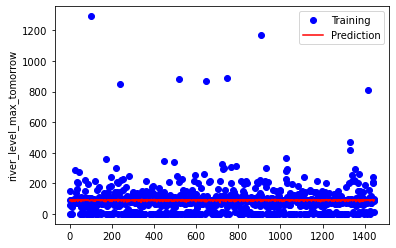

In [21]:
plt.figure()
plt.plot(index, train_label, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Training", "Prediction"])
plt.ylabel("river_level_max_tomorrow")
plt.show()

In [22]:
prediction = model.predict(test_features)
index = range(len(prediction))

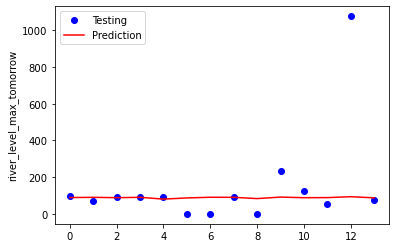

In [23]:
plt.figure()
plt.plot(index, test_label, 'ob')
plt.plot(index, prediction, '-r')
plt.legend(["Testing", "Prediction"])
plt.ylabel("river_level_max_tomorrow")
plt.show()

# Generate a saved model

In [24]:
export_dir = 'save_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: save_model/assets


In [25]:
#model.save("simple_model.h5")

# Convert the saved model to TFLite

In [26]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [28]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

13056